### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler 

### Import Dataset

In [2]:
df = pd.read_csv("./Sample-DS.csv")
df.head()

,Date,Weekday,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
0,2016-01-01,Friday,0,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
1,2016-01-01,Friday,1,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2,2016-01-01,Friday,2,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
3,2016-01-01,Friday,12,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
4,2016-01-01,Friday,13,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


### Getting info about dataset

In [3]:
df.isnull().sum()

Date                 0
Weekday              0
Hour                 0
HOEP                 0
Ontario_Demand       0
Temperature          0
Windchill_Index      0
Wind_Speed           0
Humidex              0
Relative_Humidity    0
Dew_Point            0
Pressure_Station     0
dtype: int64

In [4]:
df.describe()

,Hour,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
count,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000,39408.000000
mean,11.625076,13.923340,15397.914205,9.421272,6.565978,16.854243,9.859521,68.028598,3.330397,99.533605
std,6.945136,11.902378,2201.241563,10.899602,13.513148,9.220125,14.325742,16.773789,10.269080,0.776696
min,0.000000,-2.770000,9831.000000,-26.000000,-39.660000,0.000000,-31.100000,13.000000,-31.600000,96.490000
25%,6.000000,3.300000,13775.000000,0.800000,-3.950000,10.000000,-1.680000,57.000000,-4.400000,99.050000
50%,12.000000,12.950000,15272.000000,8.600000,5.670000,16.000000,7.860000,69.000000,3.000000,99.540000
75%,18.000000,22.510000,16881.000000,19.000000,18.580000,22.000000,22.350000,81.000000,12.100000,100.040000
max,23.000000,44.110000,24281.000000,35.100000,37.940000,80.000000,50.350000,100.000000,25.100000,102.410000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39408 entries, 0 to 39407
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               39408 non-null  object 
 1   Weekday            39408 non-null  object 
 2   Hour               39408 non-null  int64  
 3   HOEP               39408 non-null  float64
 4   Ontario_Demand     39408 non-null  int64  
 5   Temperature        39408 non-null  float64
 6   Windchill_Index    39408 non-null  float64
 7   Wind_Speed         39408 non-null  int64  
 8   Humidex            39408 non-null  float64
 9   Relative_Humidity  39408 non-null  int64  
 10  Dew_Point          39408 non-null  float64
 11  Pressure_Station   39408 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 3.6+ MB


In [6]:
df["Weekday"].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

### Work on date

In [7]:

date_hour = []
for idx, date in enumerate(df['Date']):
    time = df['Hour'][idx]
    combined = f"{date} {time}"
    date_hour.append(dt.datetime.strptime(combined, '%Y-%m-%d %H'))
    

df['Date_Hour'] = date_hour

df = df.drop(['Date', 'Hour'], axis=1)

df = df.set_index('Date_Hour')


In [8]:
df.head()

,Weekday,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
Date_Hour,,,,,,,,,,
2016-01-01 00:00:00,Friday,0.49,14023,-0.3,-5.62,20,-3.18,70,-5.1,99.67
2016-01-01 01:00:00,Friday,-1.09,13417,-0.3,-6.30,25,-3.48,68,-5.5,99.63
2016-01-01 02:00:00,Friday,-2.41,12968,-0.4,-6.55,26,-3.43,73,-4.7,99.59
2016-01-01 12:00:00,Friday,0.00,14215,-2.1,-8.72,23,-4.86,76,-5.8,99.39
2016-01-01 13:00:00,Friday,0.00,14443,-2.4,-8.23,19,-5.09,84,-4.7,99.35


### Plot and Review the columns

#### Ontario_Demand

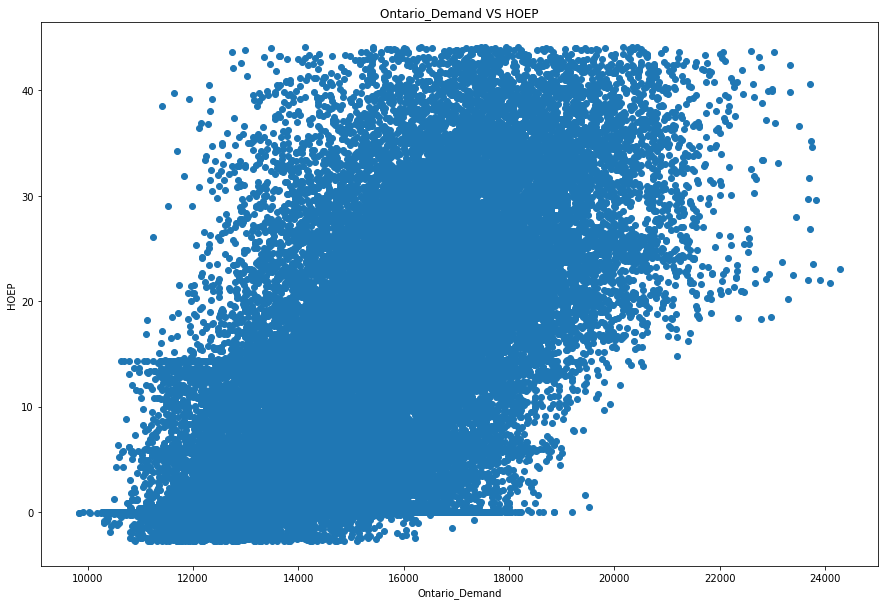

In [9]:
plt.figure(figsize=(15, 10))

plt.title("Ontario_Demand VS HOEP")
plt.xlabel("Ontario_Demand")
plt.ylabel("HOEP")
plt.scatter(df['Ontario_Demand'], df['HOEP'])

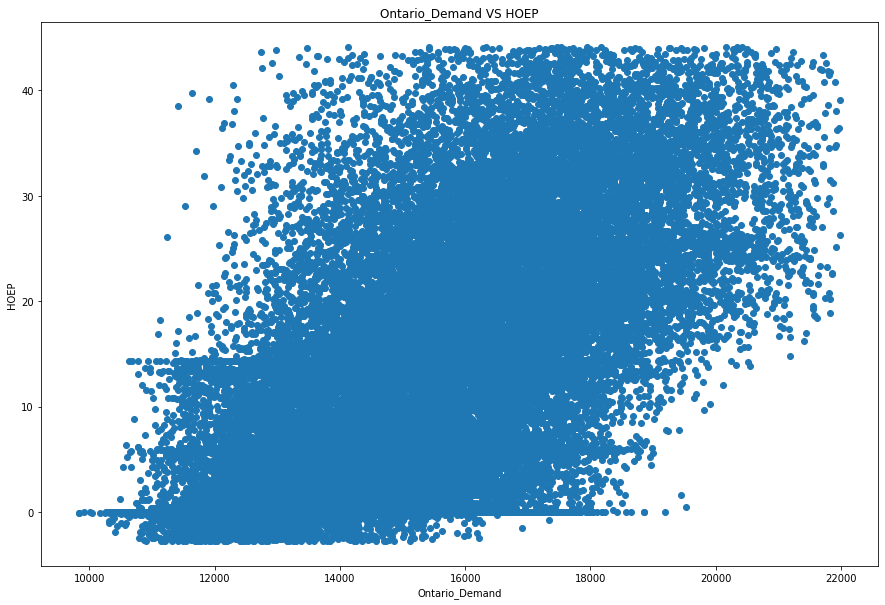

In [10]:
# Filter Ontario_Demand more than 22000
df = df[df['Ontario_Demand'] < 22000]


# Plot result
plt.figure(figsize=(15, 10))
plt.title("Ontario_Demand VS HOEP")
plt.xlabel("Ontario_Demand")
plt.ylabel("HOEP")
plt.scatter(df['Ontario_Demand'], df['HOEP'])



#### Temperature

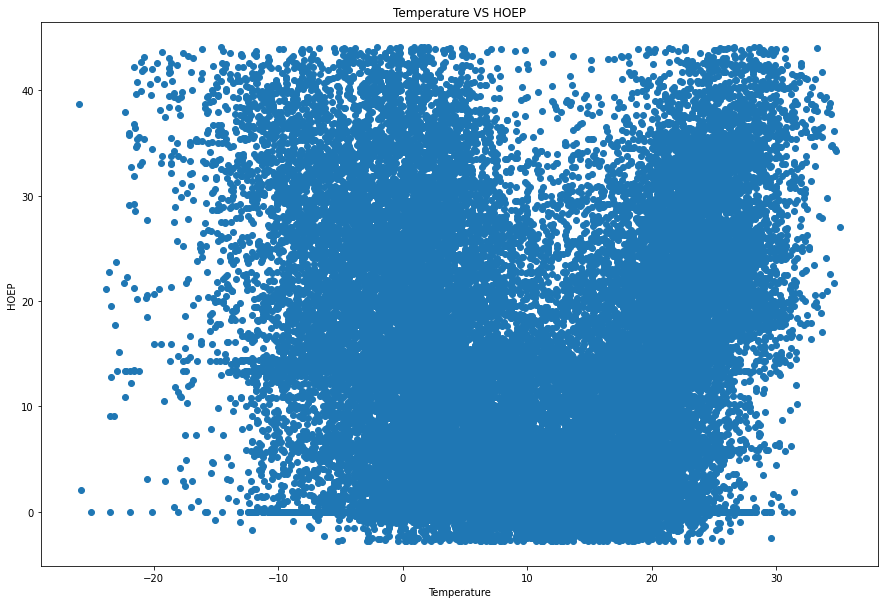

In [11]:
plt.figure(figsize=(15, 10))

plt.title("Temperature VS HOEP")
plt.xlabel("Temperature")
plt.ylabel("HOEP")
plt.scatter(df['Temperature'], df['HOEP'])

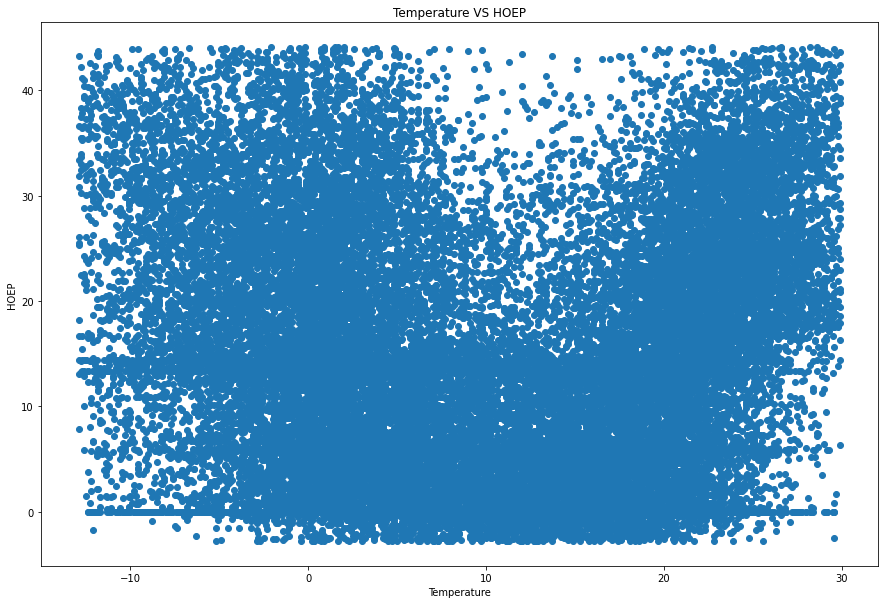

In [12]:
# Filter Temprature more than -13 and less than 30 degree
df = df[(df['Temperature'] > -13) & (df['Temperature'] < 30)]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Temperature VS HOEP")
plt.xlabel("Temperature")
plt.ylabel("HOEP")
plt.scatter(df['Temperature'], df['HOEP'])



#### Windchill_Index

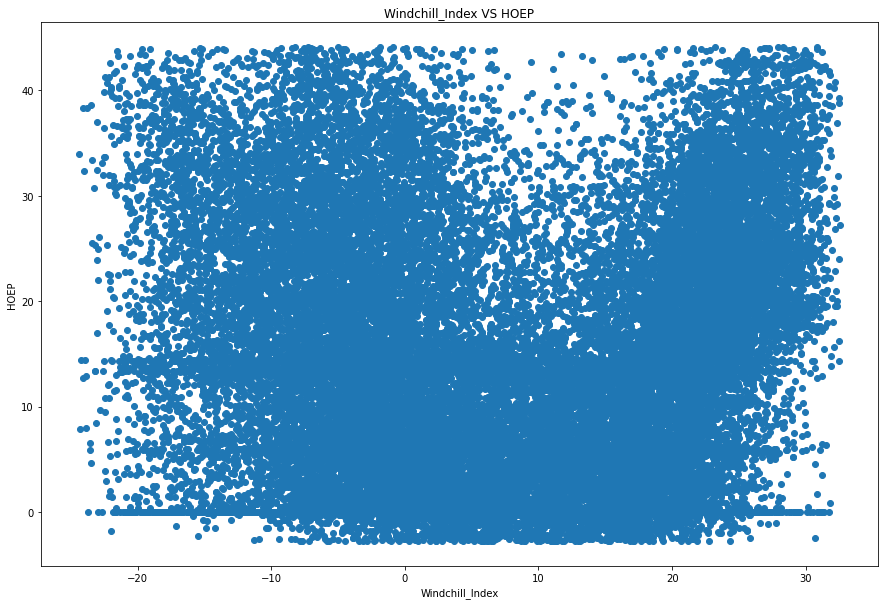

In [13]:
plt.figure(figsize=(15, 10))

plt.title("Windchill_Index VS HOEP")
plt.xlabel("Windchill_Index")
plt.ylabel("HOEP")
plt.scatter(df['Windchill_Index'], df['HOEP'])

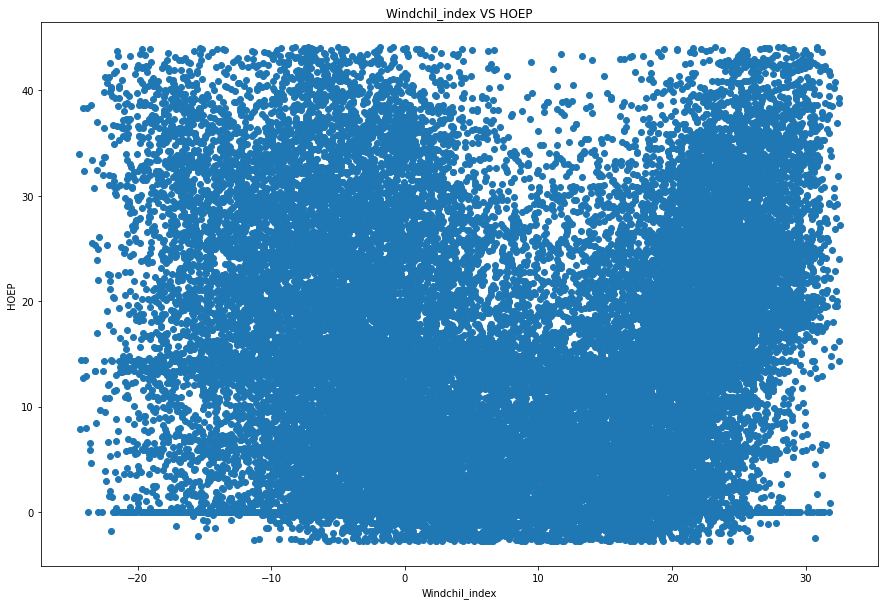

In [14]:
# Filter Temprature more than -30
df = df[df['Windchill_Index'] > -30]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Windchil_index VS HOEP")
plt.xlabel("Windchil_index")
plt.ylabel("HOEP")
plt.scatter(df['Windchill_Index'], df['HOEP'])

#### Wind_Speed

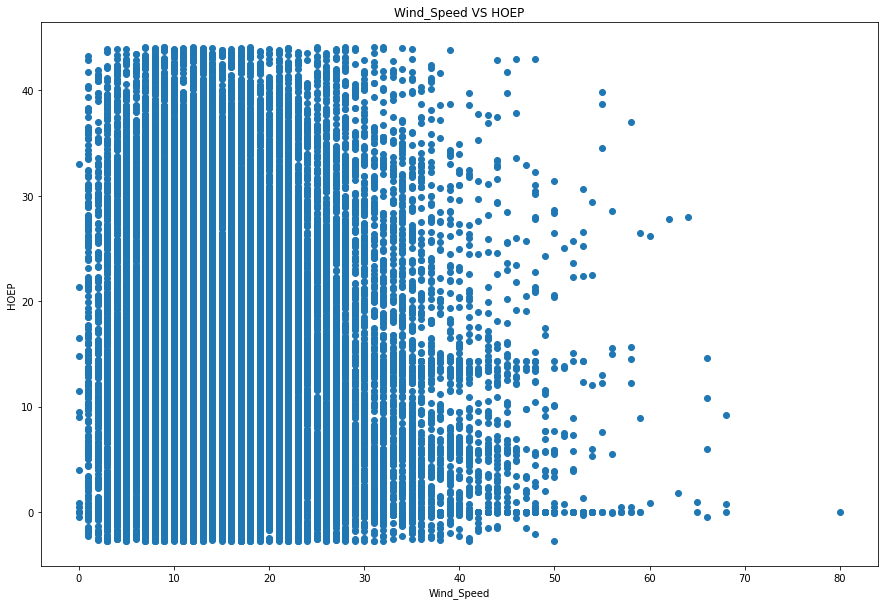

In [15]:
plt.figure(figsize=(15, 10))

plt.title("Wind_Speed VS HOEP")
plt.xlabel("Wind_Speed")
plt.ylabel("HOEP")
plt.scatter(df['Wind_Speed'], df['HOEP'])

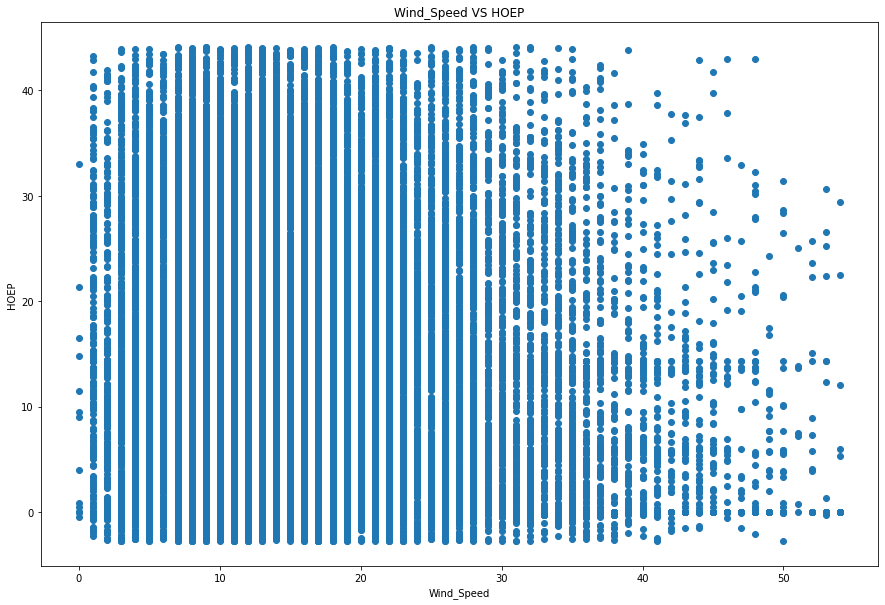

In [16]:
# Filter Wind_Speed less than 55
df = df[df['Wind_Speed'] < 55 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Wind_Speed VS HOEP")
plt.xlabel("Wind_Speed")
plt.ylabel("HOEP")
plt.scatter(df['Wind_Speed'], df['HOEP'])

#### Humidex

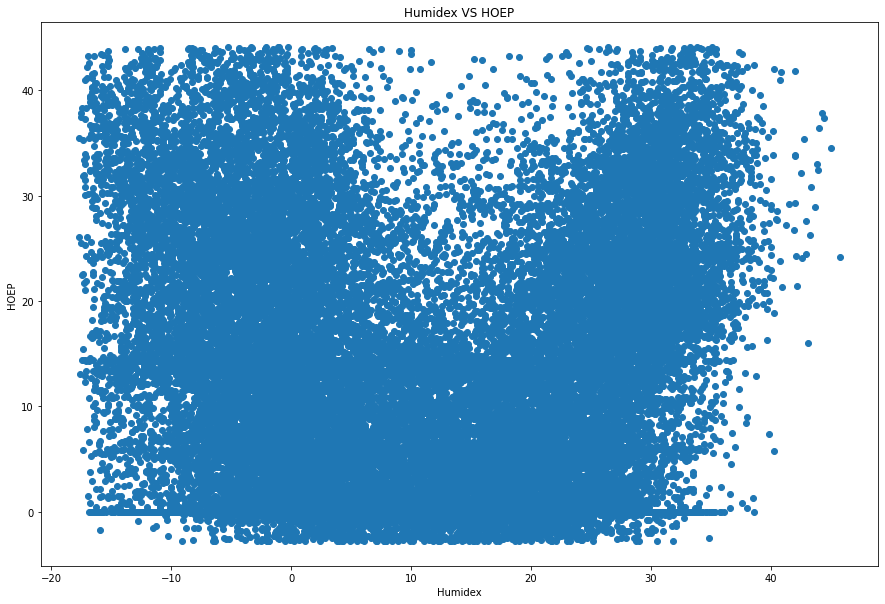

In [17]:
plt.figure(figsize=(15, 10))

plt.title("Humidex VS HOEP")
plt.xlabel("Humidex")
plt.ylabel("HOEP")
plt.scatter(df['Humidex'], df['HOEP'])

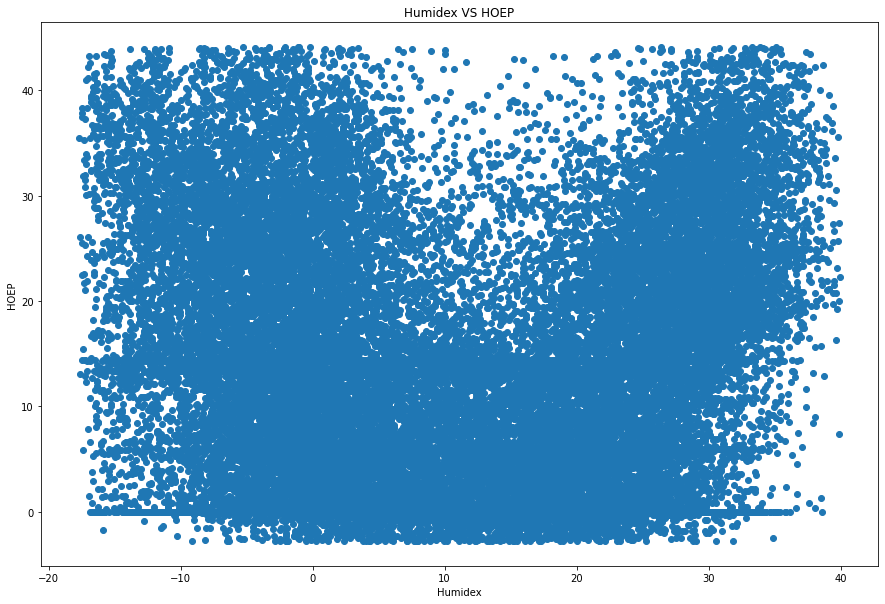

In [18]:
# Filter Humidex less than 40
df = df[df['Humidex'] < 40 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Humidex VS HOEP")
plt.xlabel("Humidex")
plt.ylabel("HOEP")
plt.scatter(df['Humidex'], df['HOEP'])

#### Relative_Humidity

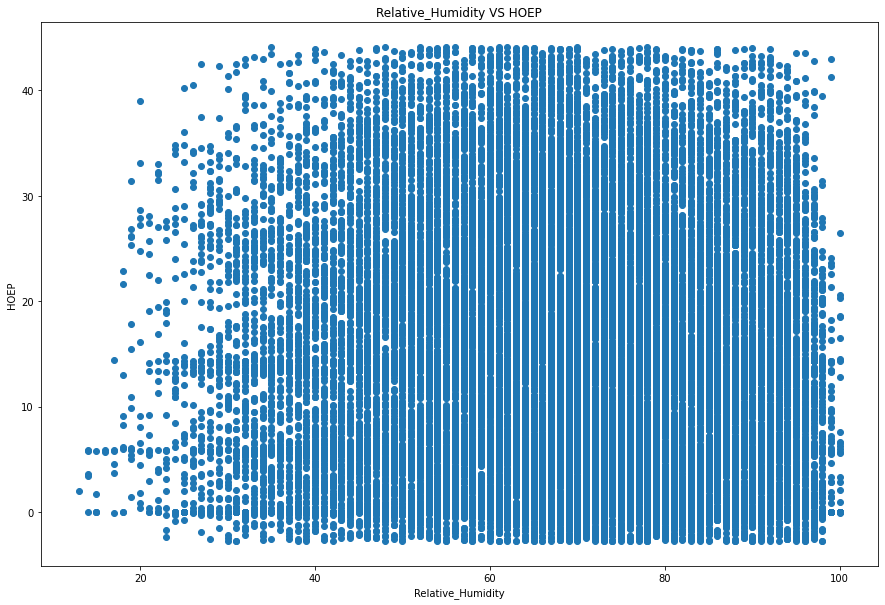

In [19]:
plt.figure(figsize=(15, 10))

plt.title("Relative_Humidity VS HOEP")
plt.xlabel("Relative_Humidity")
plt.ylabel("HOEP")
plt.scatter(df['Relative_Humidity'], df['HOEP'])

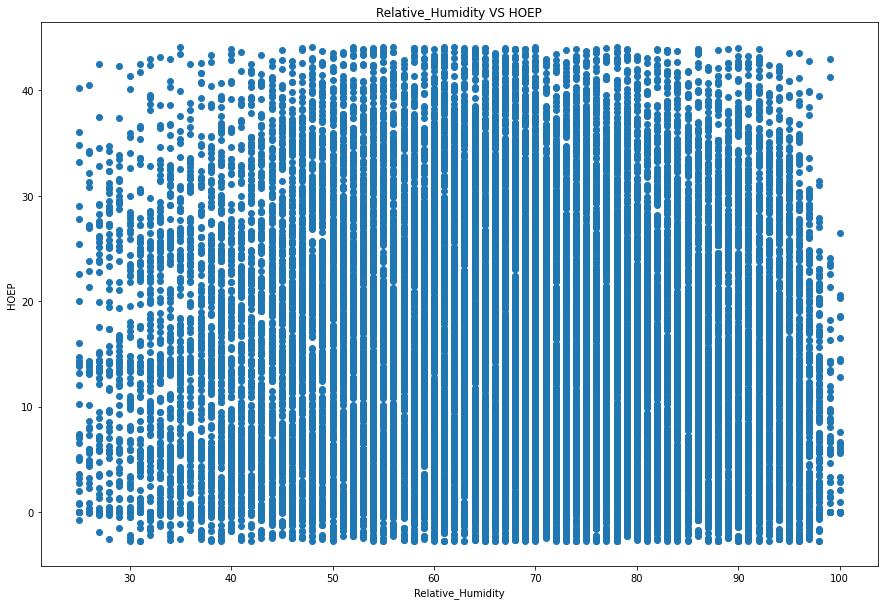

In [20]:
# Filter Relative_Humidity more than 24
df = df[df['Relative_Humidity'] > 24 ]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Relative_Humidity VS HOEP")
plt.xlabel("Relative_Humidity")
plt.ylabel("HOEP")
plt.scatter(df['Relative_Humidity'], df['HOEP'])

#### Dew_Point

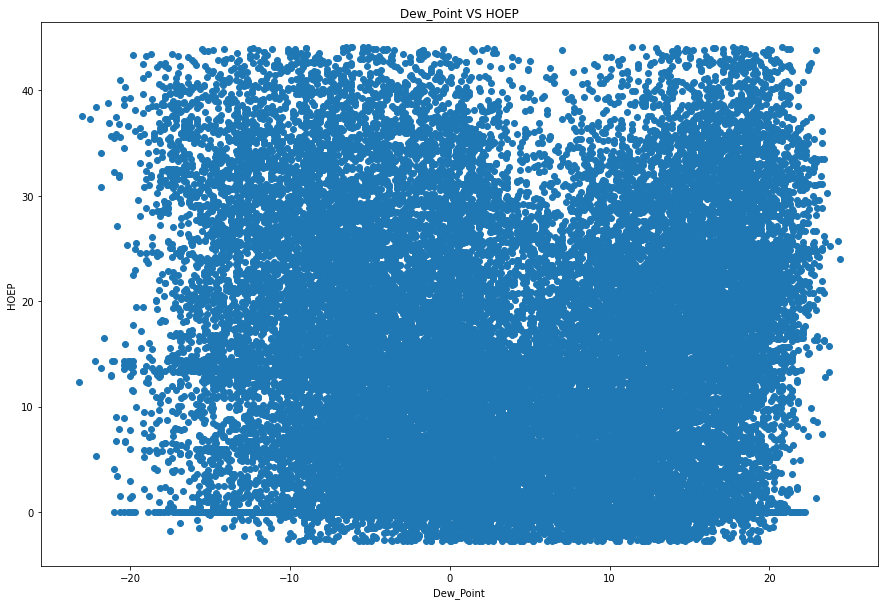

In [21]:
plt.figure(figsize=(15, 10))

plt.title("Dew_Point VS HOEP")
plt.xlabel("Dew_Point")
plt.ylabel("HOEP")
plt.scatter(df['Dew_Point'], df['HOEP'])

#### Pressure_Station

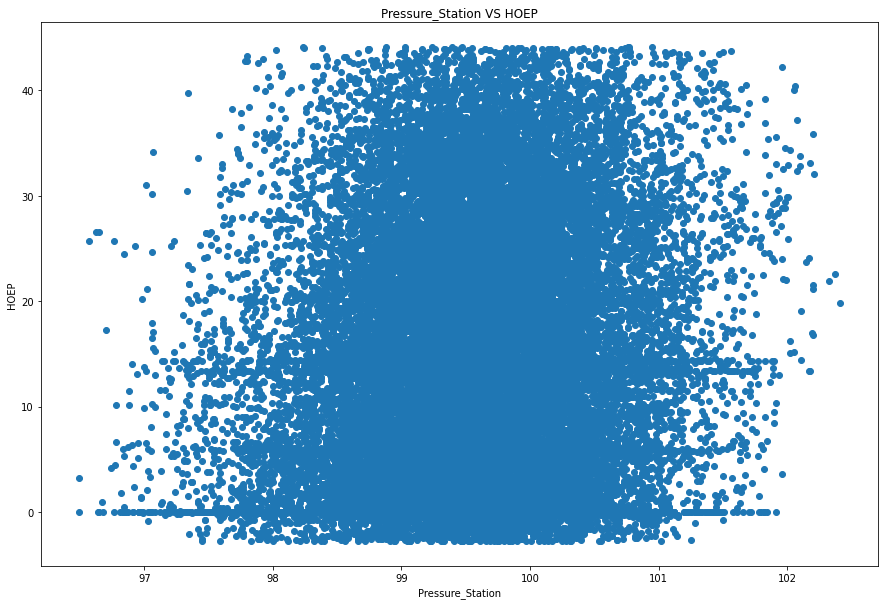

In [22]:
plt.figure(figsize=(15, 10))

plt.title("Pressure_Station VS HOEP")
plt.xlabel("Pressure_Station")
plt.ylabel("HOEP")
plt.scatter(df['Pressure_Station'], df['HOEP'])

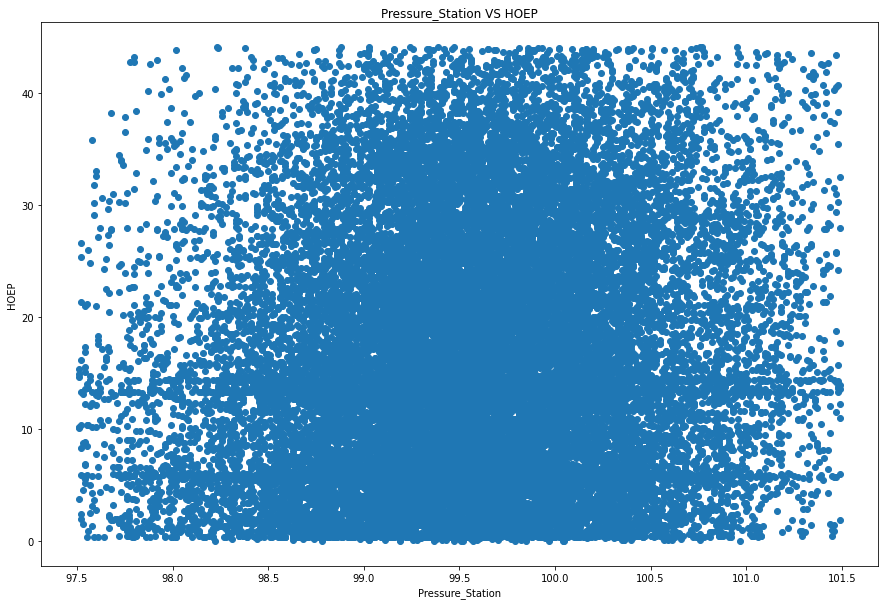

In [23]:
# Filter Pressure_Station more than -13 and less than 30 degree
df = df[(df['Pressure_Station'] > 97.5) & (df['Pressure_Station'] < 101.5)]
df = df[df["HOEP"] > 0]

# Plot result
plt.figure(figsize=(15, 10))
plt.title("Pressure_Station VS HOEP")
plt.xlabel("Pressure_Station")
plt.ylabel("HOEP")
plt.scatter(df['Pressure_Station'], df['HOEP'])

In [24]:
df.corr()

,HOEP,Ontario_Demand,Temperature,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Dew_Point,Pressure_Station
HOEP,1.000000,0.540039,0.006329,0.013762,-0.082967,0.023732,-0.040442,-0.006966,0.104100
Ontario_Demand,0.540039,1.000000,0.051979,0.037241,0.186378,0.070727,-0.131145,0.006667,-0.095541
Temperature,0.006329,0.051979,1.000000,0.994206,-0.155165,0.992170,-0.204181,0.931633,-0.183495
Windchill_Index,0.013762,0.037241,0.994206,1.000000,-0.232014,0.988394,-0.179284,0.934368,-0.167037
Wind_Speed,-0.082967,0.186378,-0.155165,-0.232014,1.000000,-0.163054,-0.182453,-0.221738,-0.223970
Humidex,0.023732,0.070727,0.992170,0.988394,-0.163054,1.000000,-0.123941,0.955658,-0.203095
Relative_Humidity,-0.040442,-0.131145,-0.204181,-0.179284,-0.182453,-0.123941,1.000000,0.159835,-0.264896
Dew_Point,-0.006966,0.006667,0.931633,0.934368,-0.221738,0.955658,0.159835,1.000000,-0.275247
Pressure_Station,0.104100,-0.095541,-0.183495,-0.167037,-0.223970,-0.203095,-0.264896,-0.275247,1.000000


In [25]:
df = df.drop(["Temperature" , "Dew_Point"], axis=1)

In [26]:
df.corr()

,HOEP,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station
HOEP,1.000000,0.540039,0.013762,-0.082967,0.023732,-0.040442,0.104100
Ontario_Demand,0.540039,1.000000,0.037241,0.186378,0.070727,-0.131145,-0.095541
Windchill_Index,0.013762,0.037241,1.000000,-0.232014,0.988394,-0.179284,-0.167037
Wind_Speed,-0.082967,0.186378,-0.232014,1.000000,-0.163054,-0.182453,-0.223970
Humidex,0.023732,0.070727,0.988394,-0.163054,1.000000,-0.123941,-0.203095
Relative_Humidity,-0.040442,-0.131145,-0.179284,-0.182453,-0.123941,1.000000,-0.264896
Pressure_Station,0.104100,-0.095541,-0.167037,-0.223970,-0.203095,-0.264896,1.000000


In [27]:
group_by_weekday = df.groupby("Weekday").mean()
group_by_weekday

,HOEP,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station
Weekday,,,,,,,
Friday,16.513940,15825.595825,6.850953,16.442594,10.127424,67.465023,99.577599
Monday,17.356573,15874.222771,7.096654,15.777004,10.306782,68.582529,99.597799
Saturday,15.094978,14950.501735,6.397504,15.925746,9.652364,68.159380,99.644002
Sunday,14.560379,14832.288030,6.749065,15.928180,9.928354,68.052868,99.638671
Thursday,17.284135,16049.743746,7.035404,16.073091,10.346941,68.593648,99.519102
Tuesday,17.468094,16072.109173,7.185640,15.815245,10.450887,68.702842,99.533127
Wednesday,17.433458,16057.690945,6.890514,16.463255,10.230494,67.435914,99.517773


### X and y

In [28]:
y = df.loc[:, ['HOEP']]
df = df.drop(['HOEP'], axis=1)

y


,HOEP
Date_Hour,
2016-01-01 00:00:00,0.49
2016-01-01 17:00:00,1.00
2016-01-01 18:00:00,6.34
2016-01-01 19:00:00,5.88
2016-01-01 20:00:00,5.81
...,...
2020-12-31 19:00:00,36.85
2020-12-31 20:00:00,19.69
2020-12-31 21:00:00,20.78


In [29]:
X = df.iloc[:, :]
X

,Weekday,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station
Date_Hour,,,,,,,
2016-01-01 00:00:00,Friday,14023,-5.62,20,-3.18,70,99.67
2016-01-01 17:00:00,Friday,15763,-11.19,35,-5.82,71,99.41
2016-01-01 18:00:00,Friday,16979,-11.19,35,-6.39,71,99.48
2016-01-01 19:00:00,Friday,16859,-10.41,28,-6.34,73,99.54
2016-01-01 20:00:00,Friday,16552,-10.16,26,-6.22,73,99.57
...,...,...,...,...,...,...,...
2020-12-31 19:00:00,Thursday,17384,-4.02,13,-2.69,74,100.66
2020-12-31 20:00:00,Thursday,16783,-5.59,16,-3.58,65,100.76
2020-12-31 21:00:00,Thursday,16154,-7.44,12,-3.67,80,100.81


In [30]:
X = pd.get_dummies(X,
                    columns=['Weekday'],
                    prefix='weekday',
                    drop_first=True)

X

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Date_Hour,,,,,,,,,,,,
2016-01-01 00:00:00,14023,-5.62,20,-3.18,70,99.67,0,0,0,0,0,0
2016-01-01 17:00:00,15763,-11.19,35,-5.82,71,99.41,0,0,0,0,0,0
2016-01-01 18:00:00,16979,-11.19,35,-6.39,71,99.48,0,0,0,0,0,0
2016-01-01 19:00:00,16859,-10.41,28,-6.34,73,99.54,0,0,0,0,0,0
2016-01-01 20:00:00,16552,-10.16,26,-6.22,73,99.57,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,17384,-4.02,13,-2.69,74,100.66,0,0,0,1,0,0
2020-12-31 20:00:00,16783,-5.59,16,-3.58,65,100.76,0,0,0,1,0,0
2020-12-31 21:00:00,16154,-7.44,12,-3.67,80,100.81,0,0,0,1,0,0


In [31]:
X_columns =  X.columns
norm = StandardScaler()
df_scaled = norm.fit_transform(X.to_numpy())
df_scaled = pd.DataFrame(df_scaled, 
                        index=df.index,
                        columns=X_columns)
                                    
df_scaled

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Date_Hour,,,,,,,,,,,,
2016-01-01 00:00:00,-0.810437,-0.929800,0.455578,-0.927279,0.113155,0.135944,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513
2016-01-01 17:00:00,0.037059,-1.343688,2.191724,-1.110826,0.174144,-0.230383,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513
2016-01-01 18:00:00,0.629333,-1.343688,2.191724,-1.150455,0.174144,-0.131757,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513
2016-01-01 19:00:00,0.570885,-1.285728,1.381523,-1.146979,0.296123,-0.047219,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513
2016-01-01 20:00:00,0.421355,-1.267152,1.150036,-1.138636,0.296123,-0.004951,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,0.826595,-0.810909,-0.354624,-0.893212,0.357112,1.530806,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513
2020-12-31 20:00:00,0.533868,-0.927571,-0.007394,-0.955089,-0.191792,1.671701,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513
2020-12-31 21:00:00,0.227502,-1.065038,-0.470367,-0.961346,0.723049,1.742149,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513


In [32]:
df_scaled['time'] = np.arange(len(df_scaled.index))
df_scaled

,Ontario_Demand,Windchill_Index,Wind_Speed,Humidex,Relative_Humidity,Pressure_Station,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,time
Date_Hour,,,,,,,,,,,,,
2016-01-01 00:00:00,-0.810437,-0.929800,0.455578,-0.927279,0.113155,0.135944,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513,0
2016-01-01 17:00:00,0.037059,-1.343688,2.191724,-1.110826,0.174144,-0.230383,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513,1
2016-01-01 18:00:00,0.629333,-1.343688,2.191724,-1.150455,0.174144,-0.131757,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513,2
2016-01-01 19:00:00,0.570885,-1.285728,1.381523,-1.146979,0.296123,-0.047219,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513,3
2016-01-01 20:00:00,0.421355,-1.267152,1.150036,-1.138636,0.296123,-0.004951,-0.408776,-0.401787,-0.384726,-0.416460,-0.418955,-0.41513,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,0.826595,-0.810909,-0.354624,-0.893212,0.357112,1.530806,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513,31097
2020-12-31 20:00:00,0.533868,-0.927571,-0.007394,-0.955089,-0.191792,1.671701,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513,31098
2020-12-31 21:00:00,0.227502,-1.065038,-0.470367,-0.961346,0.723049,1.742149,-0.408776,-0.401787,-0.384726,2.401191,-0.418955,-0.41513,31099


## Models

In [33]:
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [34]:
X = df_scaled[['Ontario_Demand' , 'Windchill_Index', 'Wind_Speed', 'Humidex', 'Relative_Humidity', 'Pressure_Station', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'time']]

X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(24881, 13)
(6221, 13)
(24881, 1)
(6221, 1)


In [35]:
models = {'LR': LinearRegression(),
            'DT': DecisionTreeRegressor(),
            'SVR': SVR(),
            'RF': RandomForestRegressor()}


In [36]:
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('Linear Regression -->')
# print("MSE: ", mse)
# print("MAE: ", mae)


In [37]:
# model = DecisionTreeRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nDecisionTreeRegressor -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [38]:
# model = SVR()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nSVR -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [39]:
# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)

# print('\nRandomForestRegressor -->')
# print("MSE: ", mse)
# print("MAE: ", mae)

In [40]:
results = {}

for idx, ml in enumerate(models):
    model = models[ml]
    # model_name = type(model).__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[idx] = {}
    results[idx]['MSE'] = mean_squared_error(y_test, y_pred)
    results[idx]['MAE'] = mean_absolute_error(y_test, y_pred)

    print(results)

{0: {'MSE': 74.9657977948549, 'MAE': 6.899545617019236}}
{0: {'MSE': 74.9657977948549, 'MAE': 6.899545617019236}, 1: {'MSE': 94.8590415688796, 'MAE': 6.831843755023308}}


C:\Users\Stoo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{0: {'MSE': 74.9657977948549, 'MAE': 6.899545617019236}, 1: {'MSE': 94.8590415688796, 'MAE': 6.831843755023308}, 2: {'MSE': 116.21851244530214, 'MAE': 8.75487249324764}}


C:\Users\Stoo\AppData\Local\Temp/ipykernel_10760/4060108575.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


{0: {'MSE': 74.9657977948549, 'MAE': 6.899545617019236}, 1: {'MSE': 94.8590415688796, 'MAE': 6.831843755023308}, 2: {'MSE': 116.21851244530214, 'MAE': 8.75487249324764}, 3: {'MSE': 46.857559161421, 'MAE': 5.065424144028292}}
